In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [ ]:
df = pd.read_csv('outliers.csv',sep=';') # Visualizar dataset previo importar para pasar los parámetros correctos
df.head()

## Ejercicio Normalización

Se les brinda un dataset con 500 valores (`outliers.csv`) que deben ser preprocesados previo entrar en la etapa de modelado de datos.

- Realizar un split de datos del 80/20. Pueden realizar el split utilizando una función desarrollada por ustedes, o en cuyo caso, utilizar la librería `from sklearn.model_selection import train_test_split` Para mayor información de como utilizarla [Tran Test Split sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Seleccionar `h` como atributo label/target

- Aplicar el proceso de normalización


In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test =

In [ ]:
# Split manual
df_train = 
df_test = 
X_train = 
X_test = 
display (X_train)
display (X_test)

In [ ]:
# Limpieza de datos: normalización.
normalizer = 
X_train_norm = 
print(X_train_norm)

## Ejercicio Estandarización

Se les brinda un dataset con 500 valores (`outliers.csv`) que deben ser preprocesados previo entrar en la etapa de modelado de datos.

- Realizar un split de datos del 80/20. Pueden realizar el split utilizando una función desarrollada por ustedes, o en cuyo caso, utilizar la librería `from sklearn.model_selection import train_test_split` Para mayor información de como utilizarla [Tran Test Split sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Seleccionar `h` como atributo label/target

- Aplicar el proceso de estandarización


In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test =

In [ ]:
# Split manual
df_train = 
df_test = 
X_train = 
X_test = 
display (X_train)
display (X_test)

In [ ]:
# Limpieza de datos: estandarización.
standardizer = 
X_train_std = 
print(X_train_std)

## Ejercicio 

Se les brinda un dataset de las estadísticas de youtube del año 2023 (`global_youtube_statistics.csv`) que deben ser preprocesados previo entrar en la etapa de modelado de datos.

- Crear un nuevo dataframe con los siguientes atributos `suscribers`, `video views`, `uploads`, `created_year`, `channel_type` 
- Realizar un split de datos del 80/20. Pueden realizar el split utilizando una función desarrollada por ustedes, o en cuyo caso, utilizar la librería `from sklearn.model_selection import train_test_split` Para mayor información de como utilizarla [Tran Test Split sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Seleccionar `channel_type`  como atributo label/target
- Aplicar el método de preprocesamiento que considere apropiado

In [ ]:
df = pd.read_csv('global_youtube_statistics.csv', sep=';', encoding='unicode_escape')
df

In [ ]:
df_2 = df[['subscribers', 'video views', 'uploads', 'created_year', 'channel_type']]
df_2.isnull().sum().sum()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_2[['subscribers', 'video views', 'uploads', 'created_year']], 
                                                    df_2['channel_type'], 
                                                    test_size=0.2, 
                                                    random_state=42)
print("Display Train/Test data")
print("-----------------------------")
display (X_train.head())
print("-----------------------------")
display (X_test.head())
print("-----------------------------")
display (y_train.head())
print("-----------------------------")
display (y_test.head())

In [ ]:
normalizer = preprocessing.MinMaxScaler() #Normalización - Instanciamos normalizador
X_train_norm = normalizer.fit_transform(X_train) #Al normalizador le aplico el método fit_transform para poder normalizar los datos
print(X_train_norm)

## Ejercicio outliers 

Se les brinda un dataset con 500 valores (`outliers.csv`) que deben ser preprocesados previo entrar en la etapa de modelado de datos.

- Realizar un split de datos del 80/20. Pueden realizar el split utilizando una función desarrollada por ustedes, o en cuyo caso, utilizar la librería `from sklearn.model_selection import train_test_split` Para mayor información de como utilizarla [Tran Test Split sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Seleccionar `h` como atributo label/target

- Identificar los posibles outliers usando los algoritmos de `EllipticEnvelope`, `OneClassSVM`, y utilizando el método `IQR`

In [ ]:
from scipy import stats
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from numpy import quantile, where, random
import matplotlib.pyplot as plt
df = pd.read_csv('outliers.csv',sep=';') # Visualizar dataset previo importar para pasar los parámetros correctos
df.head()

### EllipticEnvelope

In [ ]:
# EllipticEnvelope
algorithm = EllipticEnvelope(support_fraction=None, 
                             contamination=0.25, 
                             random_state=42) 

outlier_method = algorithm.fit(X_train)
# Aplicamos el método de detección de outliers entrenado sobre nuesto dataset
df_outliers = outlier_method.predict(X_train)
print(df_outliers)

# Determinar la posición de los outliers
pos_outliers = np.where(df_outliers==-1)[0] #En este arreglo, donde tengo -1, esos son los outliers.
"""
In simple terms, np.where(array==x)[0] returns a list of indices where the conditions have been met. I'm guessing this is a result of designing numpy for extensively broad applications.
"""

print('\nOutliers en la posición: \n', pos_outliers)

# Determinar el número de outliers
print('\nNúmero de outliers: \n', len(pos_outliers))

### OneClassSVM

In [ ]:
# OneClassSVM
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
print(svm)

In [ ]:
svm.fit(X_train)
df_outliers = svm.predict(X_train)
print(df_outliers)

# Determinar la posición de los outliers
pos_outliers = np.where(df_outliers==-1)[0] #En este arreglo, donde tengo -1, esos son los outliers.
"""
In simple terms, np.where(array==x)[0] returns a list of indices where the conditions have been met. I'm guessing this is a result of designing numpy for extensively broad applications.
"""

print('\nOutliers en la posición: \n', pos_outliers)

# Determinar el número de outliers
print('\nNúmero de outliers: \n', len(pos_outliers))

### IQR

In [87]:
def find_limits_BP(df):
    # Seleccionamos el atributo que vamos a medir
    b = df

    # Seleccionamos los umbrales a partir de los cuales vamos a considerar outliers
    Q1 = stats.scoreatpercentile(b, 25)
    Q3 = stats.scoreatpercentile(b, 75)
    RIC = Q3 - Q1
    li = Q1 - 1.5*RIC #xmin
    ls = Q3 + 1.5*RIC #xmax

    # Observamos los límites inferior y superior
    print('limite inferior: ', li)
    print('limite superior: ', ls)

    # Buscamos la posición de los outliers
    pos_i = np.where(b<li)[0]
    pos_s = np.where(b>ls)[0]
    pos_outliers = np.concatenate((pos_i, pos_s))
    print('Posición de outliers: ', pos_outliers)
    print('Número de outliers: ', len(pos_outliers))

    # Dibujamos el diagrama de caja y bigotes
    prop = plt.boxplot(b)
    plt.boxplot(b)
    plt.show()

limite inferior:  -141294975.0
limite superior:  235496985.0
Posición de outliers:  [  0   0   2   3   4   6   7   8   9  10  11  13  14  15  16  17  19  20
  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230

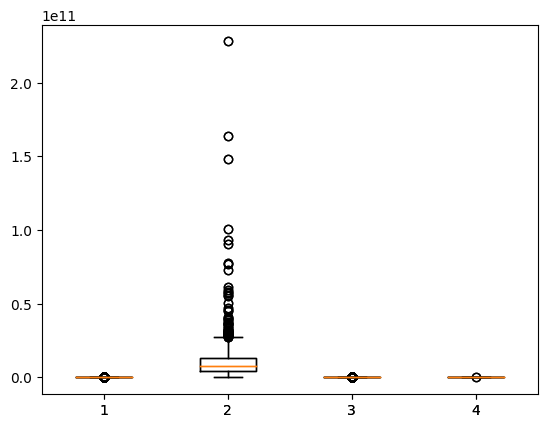

In [89]:
find_limits_BP(df_2[['subscribers', 'video views', 'uploads', 'created_year']]) #Tener en cuenta los atributos numéricos